# The Box Plot


## History of the Box Plot



John Tukey (June 16, 1915 – July 26, 2000)

![John Tukey](John_Tukey.jpg)

The box plot was invented by John Tukey.  John Tukey was a mathematician and professor in Princeton University.

He introduced this type of visual data display in 1969 and later in his 1977 book "Exploratory Data Analysis".

It was a way of visually representing the data.  As part of this visual display the data is summarised in an easily recognised visual way.

We will show examples of the box plot below but here is a brief description of the box plot and the summary statistics that can be shown on the plot. 

The box plot, also know as a box and whisker plot, is a box with the horizontal lines of the box at the 2nd and 3rd quartiles.  It shows the median as a horizontal line on the box.  The whiskers come out of the box extending down to minimum and a maximum value.  You can also show outliers above or below the whiskers as the need arises.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Box Plot Terminology

![The Box Plot](Boxplot.png)

Now I will say what each label is and we will look at a simple example below to explain the terminology in more detail.

- **Max** is the Maximum Value in the range

- **Whisker (from Max value)** = Upper 25% of values

- **Q3** is the median of the third quartile

- **Median** is the middle value of the range

- **Box** is the main body of the range of observations, the middle 50%

- **Q1** is the median of the Lower quartile

- **Whisker (to the Minimum)** is the Lower 25% of values

- **Min** is the Minimum Value in the range

- **Q1** "the 25th percentile" 

- **Q2** is "the 50th percentile" 

- **Q3** is "the 75th percentile" 

- **Outliers** are not shown here but they are when there are values outside the range of the Min and Max values

- **Interquartile Range (IQR)** is the middle 50% of observations

Now I am going to show how powerful the box plot is by doing the calculations and explaining the values and then I will plot the same set of values in a box plot to show that a picture really does paint a 1000 words.

Below we will make our own box plot as if we were doing the calculations ourselves. First of all I am using numpy.random to give me a random 20 numbers from 100.  I am using seed 1 so that the choice of 20 will not change.

In [25]:
np.random.seed(seed=1)
x = np.random.randint(100, size=15)
x

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1, 76, 71,  6, 25, 50])

- **Step 1** is to sort the numbers in numerical order.

In [26]:
np.sort(x, axis=-1, kind='quicksort', order=None)

array([ 1,  5,  6,  9, 12, 16, 25, 37, 50, 64, 71, 72, 75, 76, 79])

- **step 2** is to find the median, in our example it is 37.  This number divides our array into 2 halves.

- **Step 3** is to divide the array into quarters.  We now find the median of the other 2 halves. We will now leave out the median in our example. 1,  5,  6,  9, 12, 16, 25, and 50, 64, 71, 72, 75, 76, 79.  
9 is the median of the first half and 72 is the median of the second half.
We now have 3 points of interest, the median and the median points of the two halves, these three points divide our array into quarters, called "quartiles".  
Q1 which is the lower quartile: 9.
Q2 which is the median: 37.
Q3 which is the upper quartile: 72.

- Now we have the main body of the data which makes up the box of the box plot. The box of the box plot makes up the main bulk of the data between Q1 and Q3.

- Now we can find the interquartile range (IQR) which is Q3 - Q1.  In our example the IQR is 72 - 9 = 63

- The IQR is a useful number as it the range of the middle 50% of values and is therefore not influenced by low or high numbers.

- The minimum value in our array is 1 and our maximum value is 79.

In [27]:
df = pd.DataFrame(x)
df.describe(percentiles=None, include=None, exclude=None)

,0
count,15.000000
mean,39.866667
std,30.659109
min,1.000000
25%,10.500000
50%,37.000000
75%,71.500000
max,79.000000


Please note above that the Q1 and Q3 values are slightly different to my figures.  This is because Pandas does not exclude the median when calculating the quartiles.  
This gives us a chance to look at when there are an even number of observations and how you get the median in that case.  Looking again at Q1:  1,  5,  6,  9, 12, 16, 25, 37, now there is an even number of values so you have to take the average of the middle (9 + 12) / 2 = 10.5
Now Q3: 37, 50, 64, 71, 72, 75, 76, 79, again an even number so we take (71 + 72) / 2 = 71.5

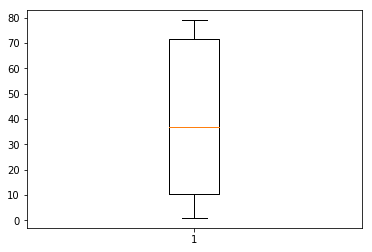

In [28]:
data = x
plt.boxplot(data)
plt.show()

## Use of the box plot

In looking at the use of the box plot I want to look at the temperatures over a 50 year period in the county that I live in. The data from the cso.ie at the weather station in Birr Co Offaly only goes to Sept 2009 so I will go back a corresponding 50 years to Sept 1959 giving me 600 lines of data.

We can see if there is a change in the temperature observations over time.

In [5]:
df = pd.read_csv("Birr Temperatures Degrees Box Plot.csv") # reading in the csv file of data
df

,Year,Birr Avg Max Temp (Deg C),Birr Avg Min Temp (Deg C),Birr Highest Temp (Deg C),Birr Lowest Temp (Deg C),Birr Mean Temp (Deg C)
0,1959M10,15.9,8.3,23.2,0.3,12.1
1,1959M11,10.2,3.0,14.6,-2.6,6.6
2,1959M12,8.9,2.5,12.5,-3.3,5.7
3,1960M01,7.6,0.8,13.0,-5.1,4.2
4,1960M02,7.3,-0.4,14.5,-6.6,3.5
5,1960M03,10.2,3.9,17.3,-2.6,7.1
6,1960M04,13.6,4.1,18.6,-3.1,8.9
7,1960M05,17.0,7.4,19.3,1.7,12.2
8,1960M06,19.6,10.2,25.0,3.4,14.9
9,1960M07,17.8,10.8,20.4,6.2,14.3


In [6]:
pd.PeriodIndex(start='1959-10', freq='M', periods=600) # adding a time series index to the data


PeriodIndex(['1959-10', '1959-11', '1959-12', '1960-01', '1960-02', '1960-03',
             '1960-04', '1960-05', '1960-06', '1960-07',
             ...
             '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05',
             '2009-06', '2009-07', '2009-08', '2009-09'],
            dtype='period[M]', length=600, freq='M')

In [8]:
df.index = pd.PeriodIndex(start='1959-10', freq='M', periods=600)
df

,Year,Birr Avg Max Temp (Deg C),Birr Avg Min Temp (Deg C),Birr Highest Temp (Deg C),Birr Lowest Temp (Deg C),Birr Mean Temp (Deg C)
1959-10,1959M10,15.9,8.3,23.2,0.3,12.1
1959-11,1959M11,10.2,3.0,14.6,-2.6,6.6
1959-12,1959M12,8.9,2.5,12.5,-3.3,5.7
1960-01,1960M01,7.6,0.8,13.0,-5.1,4.2
1960-02,1960M02,7.3,-0.4,14.5,-6.6,3.5
1960-03,1960M03,10.2,3.9,17.3,-2.6,7.1
1960-04,1960M04,13.6,4.1,18.6,-3.1,8.9
1960-05,1960M05,17.0,7.4,19.3,1.7,12.2
1960-06,1960M06,19.6,10.2,25.0,3.4,14.9
1960-07,1960M07,17.8,10.8,20.4,6.2,14.3


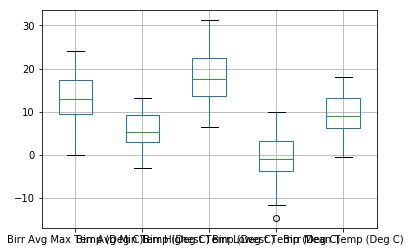

In [35]:
df.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

In [9]:
# I want to split the data into 5 data frames of 10 years each
df_1 = df[:120] 
df_2 = df[120:240]
df_3 = df[240:360]
df_4 = df[360:480]
df_5 = df[480:600]

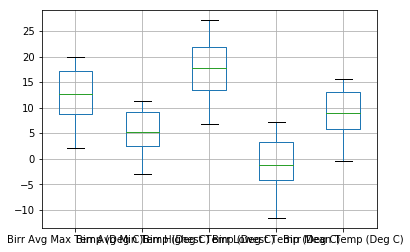

In [49]:
df_1.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

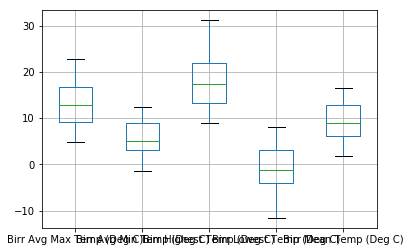

In [50]:
df_2.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

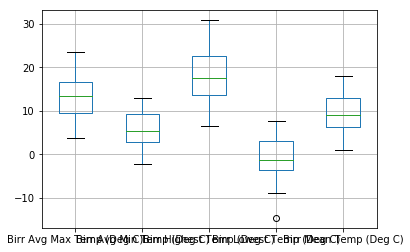

In [51]:
df_3.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

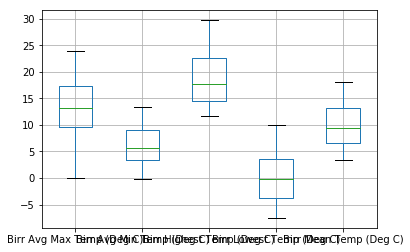

In [52]:
df_4.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

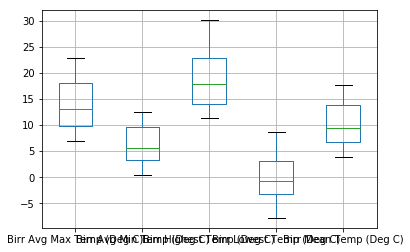

In [53]:
df_5.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

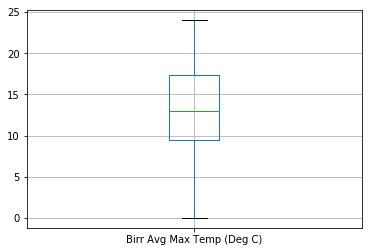

In [36]:
df.boxplot(column='Birr Avg Max Temp (Deg C)', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

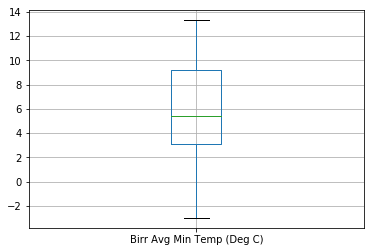

In [37]:
df.boxplot(column='Birr Avg Min Temp (Deg C)', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

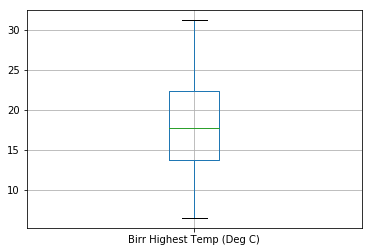

In [38]:
df.boxplot(column='Birr Highest Temp (Deg C)', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

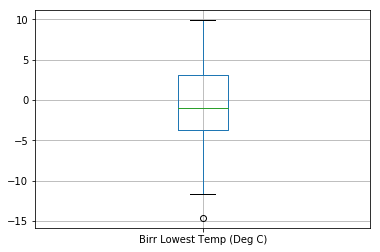

In [39]:
df.boxplot(column='Birr Lowest Temp (Deg C)', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

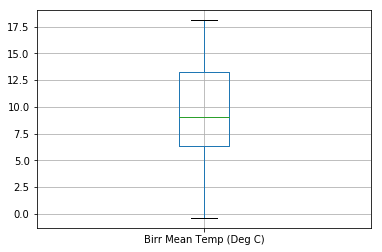

In [40]:
df.boxplot(column='Birr Mean Temp (Deg C)', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

## Box Plot Alternatives

Histograms, Bean Plots, Violin Plots, 

https://en.wikipedia.org/wiki/Box_plot

https://en.wikipedia.org/wiki/John_Tukey

https://pr.princeton.edu/news/00/q3/0727-tukey.htm

https://csml.princeton.edu/tukey

https://www.cso.ie/px/pxeirestat/statire/SelectVarVal/Define.asp?Maintable=MTM02&PLanguage=0

https://stats.stackexchange.com/questions/5854/what-are-some-alternatives-to-a-boxplot

https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-span-representation

https://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots